#### PROJECT OBJECTIVE

TRAIN A PREDICTION MODEL THAT ESTIMATES THE ANNUAL TURNOVER A GIVEN RESTAURANT WITHIN INDIA IS LIKELY TO GENERATE ANNUALLY 

### IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

### DATA LOADING AND CLEANING

In [2]:
raw_data = pd.read_csv('Indian_train.csv')

In [3]:
data = raw_data.copy()

In [4]:
## PRELIMINARY INSPECT DATA SHAPE
data.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14/02/09,84.3,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29/09/08,85.4,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30/07/11,85.0,Tier A Celebrity,68.2,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30/11/08,85.6,Tier A Celebrity,83.6,0,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22/02/10,NaN,Tier A Celebrity,76.8,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


In [5]:
print(f'Shape: {data.shape}')


Shape: (3493, 34)


In [6]:
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Opening Day of Restaurant      3493 non-null   object 
 6   Facebook Popularity Quotient   3394 non-null   float64
 7   Endorsed By                    3493 non-null   object 
 8   Instagram Popularity Quotient  3437 non-null   float64
 9   Fire Audit                     3493 non-null   int64  
 10  Liquor License Obtained        3493 non-null   int64  
 11  Situated in a Multi Complex    3493 non-null   int64  
 12  Dedicated Parking              3493 non-null   i

DATA CONTAINS 3493 ROWS AND 34 COLUMNS WITH FOUR COLUMNS SHOWING SIGNIFICANT NULL VALUES

DATA CONSISTS OF COLUMNS OF VARIOUS OBJECT TYPES

##### DIMENSIONALITY REDUCTION

In [7]:
# TODO 1. : ORDINAL DATA CONTAINING NA VALUES SHOULD NOT BE GROUPED AS FLOAT COLS
## HANDLE DATA IN BATCHES BY THE TYPE OF DATA THEY CONTAIN NOT THEIR DTYPE



In [8]:
## IDENTIFYING NA RELATIONSHIP AND DUPLICATION

In [9]:
## data does not contain any duplicate rows
data.duplicated(subset='Registration Number').all()

False

In [10]:
data.isna().sum().sort_values(ascending=False)

Live Sports Rating               3288
Value Deals Rating               2707
Comedy Gigs Rating               2483
Live Music Rating                 765
Overall Restaurant Rating         212
Facebook Popularity Quotient       99
Instagram Popularity Quotient      56
Resturant Tier                     49
Ambience                           25
Value for Money                     0
Hygiene Rating                      0
Food Rating                         0
Registration Number                 0
Order Wait Time                     0
Lively                              0
Service                             0
Comfortablility                     0
Staff Responsivness                 0
Restaurant Zomato Rating            0
Restaurant City Tier                0
Annual Turnover                     0
Restaurant Theme                    0
Restaurant Type                     0
Open Sitting Available              0
Dedicated Parking                   0
Situated in a Multi Complex         0
Liquor Licen

In [11]:
## as per the data dictionary, na values within the rating columns indicate that the associated services are not offered
## live sports rating, value deals rating and comedy gigs rating
## this variables contains no useful information for this analysis as they are practically empty 
## drop Live Sports Rating
data = data.drop(columns=['Live Sports Rating', 'Value Deals Rating', 'Comedy Gigs Rating'])

<AxesSubplot:>

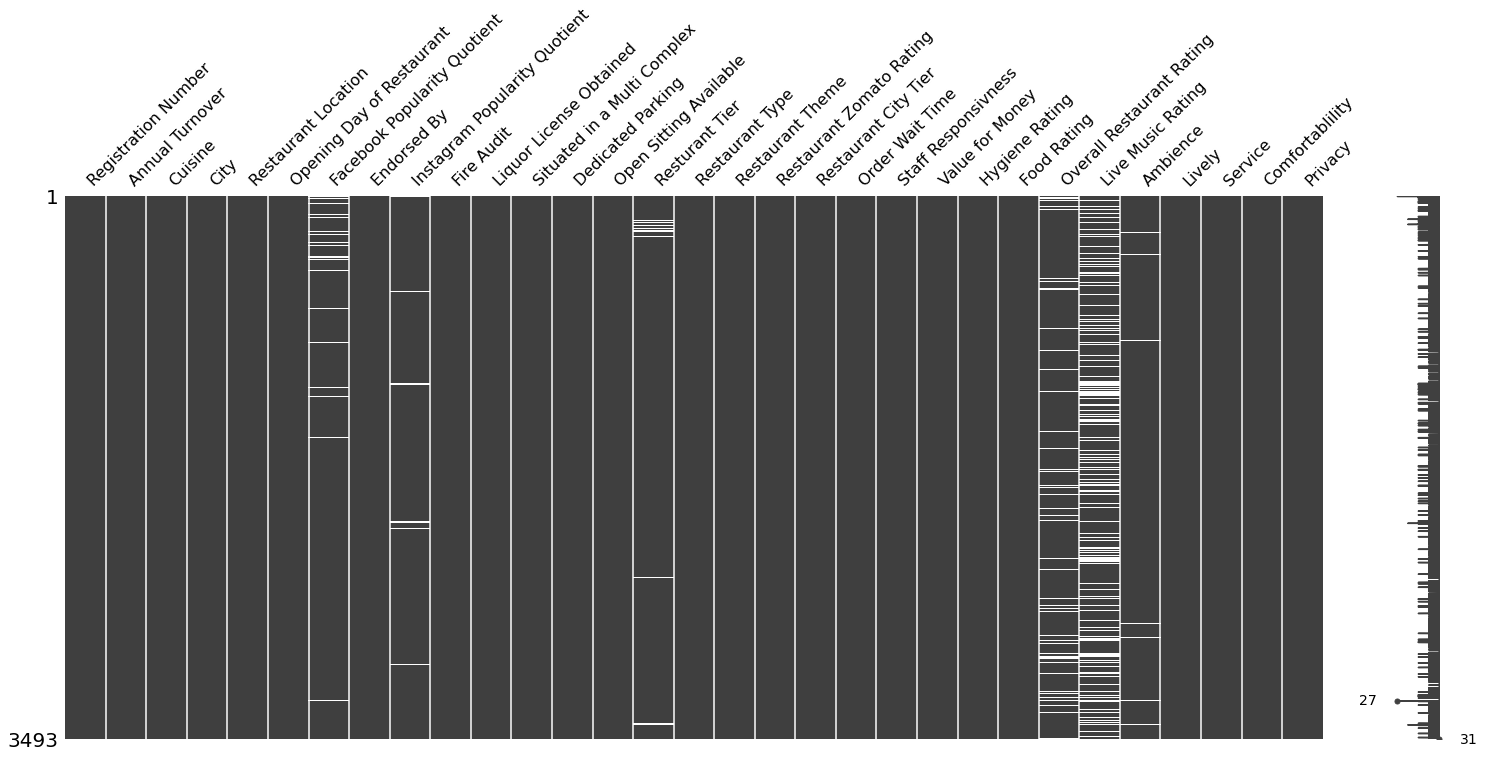

In [12]:
msno.matrix(data)

In [13]:
## registration number is a unique identifier column
## annual turnover is the target column for my prediction model

In [14]:
object_data = data.select_dtypes('object')

In [15]:
object_data['Restaurant Type'].value_counts()

Bar                         3235
Caffee                       212
Gastro Bar                    45
Buffet/Family Restaurant       1
Name: Restaurant Type, dtype: int64

In [16]:
## the restaurant type column contains low variability 
## this lack of variability reveals little on possible causes for annual turnover 
## it rather introduces noise to the dataset
data = data.drop(columns=['Restaurant Type'])

In [17]:
object_data.drop(columns=['Restaurant Type'], inplace=True)

In [18]:
## extract unique cuisine types from cuisine column
## generate dummy data from the column
## consider dummy data trap

In [19]:
unique_cuisines = object_data['Cuisine'].unique()

In [20]:
cuisine_vocab = set()
for cus in unique_cuisines:
    # temp = cus.split()
    cuisine_vocab.update(cus.split(','))

In [21]:
cuisine_vocab = list(cuisine_vocab)

In [22]:
for vocab in cuisine_vocab:
    object_data[vocab] = object_data['Cuisine'].apply(lambda x: 1 if vocab in x else 0)

In [23]:
object_data.head()

,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Endorsed By,Restaurant Theme,thai,british,korean,italian,...,swedish,irish,cuban,latvian,tibetan,belgian,cajun,sapnish,peruvian,welsh
0,"indian,irish",Bangalore,Near Business Hub,14/02/09,Not Specific,Arabian,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,"indian,irish",Indore,Near Party Hub,29/09/08,Tier A Celebrity,Greek,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,"tibetan,italian",Chennai,Near Business Hub,30/07/11,Tier A Celebrity,90's,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,"turkish,nigerian",Gurgaon,Near Party Hub,30/11/08,Tier A Celebrity,Arabian,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"irish,belgian",Manesar,Near Party Hub,22/02/10,Tier A Celebrity,Greek,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [24]:
## to avoid dummy variable trap, drop one column from cuisine dummy variables along with cuisine column
object_data.drop(columns=['Cuisine', 'jewish'], inplace=True)

In [25]:
## string in the city column do not have the same format resulting in simillar rows grouped as different rows

In [26]:
object_data['City'] = object_data['City'].str.lower().str.strip().str.replace('banglore', 'bangalore')

In [27]:
city_series = object_data['City'].value_counts()

In [28]:
cities_to_keep = city_series[city_series > 10].index

In [29]:
## consider only cities with rows > 10 for dummy grouping
## group all others as 'other_cities'
## drop one column because of dummy variable trap
## columns containing -1 lack city rows and would be dropped as imputation of values is impossible

In [30]:
object_data['City'] = object_data['City']\
                      .apply(lambda x : 'other' if x not in cities_to_keep else x)\
                      .apply(lambda x : np.nan if x == '-1' else x)


In [31]:
data['City'] = object_data['City']


In [32]:
data = data.dropna(subset=['City'])
object_data = object_data.dropna(subset=['City'])

In [33]:
city_dummies =   pd.get_dummies(object_data['City'], prefix="City")
city_dummies

,City_ahmedabad,City_bangalore,City_bhopal,City_bhubaneswar,City_chandigarh,City_chennai,City_coimbatore,City_delhi,City_faridabad,City_ghaziabad,...,City_kochi/cochin,City_kolkata,City_lucknow,City_mumbai,City_mysore,City_navi mumbai,City_new delhi,City_noida,City_other,City_pune
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3489,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3490,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3491,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
object_data = pd.concat([object_data, city_dummies], axis=1)

In [36]:
object_data = object_data.drop(columns=['City'])
object_data.head()

,Restaurant Location,Opening Day of Restaurant,Endorsed By,Restaurant Theme,thai,british,korean,italian,japanese,chinese,...,City_kochi/cochin,City_kolkata,City_lucknow,City_mumbai,City_mysore,City_navi mumbai,City_new delhi,City_noida,City_other,City_pune
0,Near Business Hub,14/02/09,Not Specific,Arabian,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Near Party Hub,29/09/08,Tier A Celebrity,Greek,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Near Business Hub,30/07/11,Tier A Celebrity,90's,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Near Party Hub,30/11/08,Tier A Celebrity,Arabian,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Near Party Hub,22/02/10,Tier A Celebrity,Greek,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [38]:
object_data['Restaurant Location'].value_counts(dropna=False)

Near Party Hub       2336
Near Business Hub     761
Name: Restaurant Location, dtype: int64

In [40]:
restaurant_location_dummies = pd.get_dummies(object_data['Restaurant Location'])
restaurant_location_dummies.drop(columns=['Near Business Hub'], inplace=True)


In [41]:
## extract dummy values from Restauarant location
object_data = pd.concat([object_data, restaurant_location_dummies], axis=1)

In [46]:
object_data.drop(columns=['Restaurant Location'], inplace=True)
data.drop(columns=['Restaurant Location'], inplace=True)

In [42]:
object_data['Endorsed By'].value_counts(dropna=False)

Not Specific        1764
Tier A Celebrity    1305
Local Celebrity       28
Name: Endorsed By, dtype: int64

In [43]:
## endorsed by column contain too much missing data to be useful
## imputation is also impossible due to lack of avsilable data to make any justifiable imputation
## the column would hence be dropped

object_data = object_data.drop(columns=['Endorsed By'])
data = data.drop(columns=['Endorsed By'])

In [44]:
object_data.head()

,Restaurant Location,Opening Day of Restaurant,Restaurant Theme,thai,british,korean,italian,japanese,chinese,algerian,...,City_kolkata,City_lucknow,City_mumbai,City_mysore,City_navi mumbai,City_new delhi,City_noida,City_other,City_pune,Near Party Hub
0,Near Business Hub,14/02/09,Arabian,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Near Party Hub,29/09/08,Greek,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Near Business Hub,30/07/11,90's,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Near Party Hub,30/11/08,Arabian,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Near Party Hub,22/02/10,Greek,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [47]:
# TODO 1. FIND OUT DATE OF DATA COLLECTION OR DATE ANNUAL TURNOVER WAS RECORDED AND CALCULATE BUSINESS AGE FROM THIS
## BIN BUSINESS AGE ROWS AND EXTRACT DUMMY DATA

In [52]:
data_themes  = object_data['Restaurant Theme'].value_counts(dropna=False)

In [55]:
prevalent_themes = data_themes[data_themes > 10].index

In [56]:
object_data['Restaurant Theme'] = object_data['Restaurant Theme']\
                                  .apply(lambda x: 'other' if x not in prevalent_themes else x)

In [57]:
theme_dummies =    pd.get_dummies(object_data['Restaurant Theme'], prefix="theme")
theme_dummies

,theme_90's,theme_Arabian,theme_Belise,theme_Chinese,theme_Delicio,theme_English,theme_Greek,theme_Molino,theme_Nature,theme_Parsi,theme_other
0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3487,1,0,0,0,0,0,0,0,0,0,0
3489,0,0,0,0,0,0,1,0,0,0,0
3490,0,0,0,0,0,0,0,0,1,0,0
3491,0,0,0,0,0,0,1,0,0,0,0


In [58]:
object_data = pd.concat([object_data, theme_dummies], axis=1)

In [59]:
object_data = object_data.drop(columns=['Restaurant Theme'])
data = data.drop(columns=['Restaurant Theme'])

In [62]:
data.drop(columns=['Cuisine', 'City'], inplace=True)

In [63]:
data.head()

,Registration Number,Annual Turnover,Opening Day of Restaurant,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,...,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,14/02/09,84.3,95.8,1,1,1,0,1,...,5,5,7,10.0,4.0,8.0,8,6,6,6
1,60002,50000000,29/09/08,85.4,85.0,1,1,1,1,0,...,6,7,8,9.0,NaN,5.0,7,7,3,8
2,60003,32500000,30/07/11,85.0,68.2,1,1,1,1,0,...,5,3,7,8.0,3.0,7.0,10,5,2,8
3,60004,110000000,30/11/08,85.6,83.6,0,1,1,1,1,...,5,6,8,9.0,6.0,7.0,7,4,3,5
4,60005,20000000,22/02/10,NaN,76.8,1,1,1,1,1,...,6,4,8,6.0,NaN,NaN,6,2,4,6
